In [42]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


dataset_root = '1-condition-splited-data'


transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),         
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder(root=dataset_root + '/train', transform=transform)
test_dataset = ImageFolder(root=dataset_root + '/test', transform=transform)
val_dataset = ImageFolder(root=dataset_root+"/validation",transform=transform)


batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [43]:
import torch
import torch.nn as nn
import torchvision.models as models

device = "cuda" if torch.cuda.is_available() else 'cpu'

# Assuming you have defined your model architecture
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 3)  # Assuming 3 output classes

# Specify the path to the saved weights file
saved_weights_path = "transfer-learning-condition-1-fit.pth"

# Load the saved weights into the model
model.load_state_dict(torch.load(saved_weights_path))

# Set the model to evaluation mode (if needed)
model.eval()

# Now, you can use the loaded model for predictions or further training


C:\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [44]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()

model.eval()  # Set the model to evaluation mode
test_loss = 0.0
correct = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        
        
        
        all_labels += labels.cpu().numpy().tolist()
        all_predictions += predicted.cpu().numpy().tolist()

test_loss /= len(test_loader.dataset)
accuracy = correct / len(test_loader.dataset) * 100.0

print(f'Test Loss: {test_loss}, Test Accuracy: {accuracy}%')


Test Loss: 0.0037263852877852817, Test Accuracy: 96.39999999999999%


Test Loss: 0.0037
Test Accuracy : 96.4000
Precision: 0.9642
Recall : 0.9640
F1 Score : 0.9640
Confusion Matrix:
[[959   4  37]
 [  1 999   0]
 [ 66   0 934]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1000
           1       1.00      1.00      1.00      1000
           2       0.96      0.93      0.95      1000

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



<Axes: >

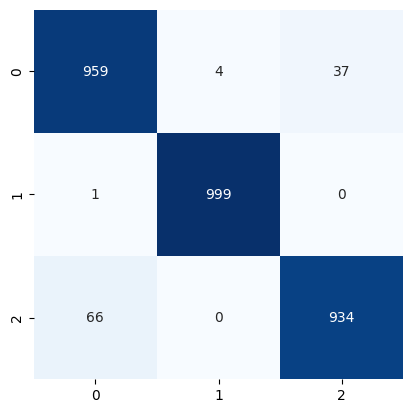

In [49]:
# Accuracy,  Precision, Recall ve F1 skoru, Karmaşıklık Matrisi, Classification Report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
f1 = f1_score(all_labels, all_predictions, average='weighted')
cm = confusion_matrix(all_labels, all_predictions)

print(f'Test Loss: {test_loss:.4f}')
print(f"Test Accuracy : {accuracy:.4f}")
print(f'Precision: {precision:.4f}')
print(f"Recall : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print('Confusion Matrix:')
print(cm)
print('\nClassification Report:')
print(classification_report(all_labels, all_predictions, target_names=[str(i) for i in range(len(test_dataset.classes))]))

sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)